# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [16]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

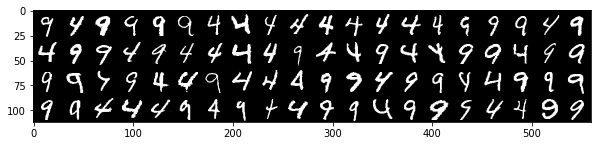

In [18]:
show_digit(X)
# Do feature normalization here
# begin answer
x_mean = np.mean(X, axis=1,dtype=np.float64)
x_var = np.var(X, axis=1,dtype=np.float64)
X = X.astype(np.float64)
for i in range(X.shape[0]):    
    if x_var[i] > 0.00001:
        X[i,:] = (X[i,:]*1.0-x_mean[i])/x_var[i] 
    else:
        X[i,:] = 0.


# end answer

0.001 16
0.01 11
0.1 15
0.0 16
1.0 32
10.0 67
100.0 90
1000.0 94
('The lmbda chosen by LOOCV is ', 0.01)


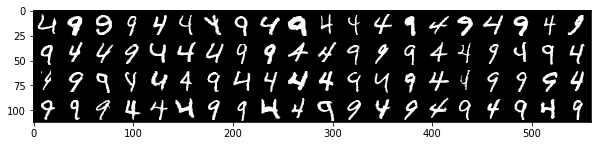

In [4]:

# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):

        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1)  # take point j out of y
        w = ridge(X_, y_, lmbdas[i])
        #E_val = Eval + __
        X1 = np.vstack((np.ones(X.shape[1]),X))
        if y[0][j]*np.dot(w.T,X1[:,j:j+1]) < 0:
            E_val += 1    
    # Update lmbda according validation error
    # begin answer        
    if E_val < E_val_min:
        lmbda = lmbdas[i]
        E_val_min = E_val
    print lmbdas[i],E_val
    
    # end answer
    
print('The lmbda chosen by LOOCV is ', lmbda)


In [19]:
# Do feature normalization to X_test, y_test
X_test = X_test.astype(np.float64)
x_mean = np.mean(X_test, axis=1,dtype=np.float64)
x_var = np.var(X_test, axis=1,dtype=np.float64)
for i in range(X.shape[0]):    
    if x_var[i] > 0.00001:
        X_test[i,:] = (X_test[i,:]*1.0-x_mean[i])/x_var[i] 
    else:
        X_test[i,:] = 0.

In [5]:
# Compute training error
# without regularization
w_without = ridge(X, y, 0)
print 'Without regularization, the sum of omega square is ',np.sum(np.dot(w_without.T,w_without))

w_with = ridge(X, y, lmbda)
print 'With regularization, the sum of omega square is ', np.sum(np.dot(w_with.T,w_with))



# Compute training error without regularization
X1 = np.vstack((np.ones(X.shape[1]),X))
d = y*np.dot(w_without.T,X1)
e_train = np.sum(d<0)
e_train /= X1.shape[1]*1.0
print 'Without regularization, the training error is: ',e_train

# Compute training error with regularization
d = y*np.dot(w_with.T,X1)
e_train = np.sum(d<0)
e_train /= X1.shape[1]*1.0
print 'With regularization, the training error is: ',e_train

# Compute test error without regularization
X1 = np.vstack((np.ones(X_test.shape[1]),X_test))
d = y_test*np.dot(w_without.T,X1)
e_test = np.sum(d<0)
e_test /= X1.shape[1]*1.0
print 'Without regularization, the testing error is: ',e_test

# Compute test error with regularization
d = y_test*np.dot(w_with.T,X1)
e_test = np.sum(d<0)
e_test /= X1.shape[1]*1.0
print 'With regularization, the testing error is: ',e_test


Without regularization, the sum of omega square is  5533.060166528366
With regularization, the sum of omega square is  1046.7918406339231
Without regularization, the training error is:  0.0
With regularization, the training error is:  0.0
Without regularization, the testing error is:  0.14264188849824208
With regularization, the testing error is:  0.07935710698141638


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [50]:
from logistic_r import logistic_r

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1])
lmbda = 0
E_val_min = float('inf')
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X, j, axis=1)  # take point j out of X
        y_ = np.delete(y, j, axis=1)  # take point j out of y
        w = logistic_r(X_, y_, lmbdas[i])
        X1 = np.vstack((np.ones(X.shape[1]),X))
        d = y[0][j]*(1./(1+np.exp(1 + np.dot(-1*w.T,X1[:,j:j+1])))-0.5)
        if d < 0 or np.isnan(d.any()):
            E_val += 1
        #d = y*(1./(1+np.exp(1 + np.dot(-1*w.T,X1)))-0.5)
        #E_train =  np.sum(d<0)
        #print E_train*1.0/y.shape[1]
    # Update lmbda according validation error
    # begin answer
    print lmbdas[i], E_val
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer
print lmbdas[i],E_val   
print 'The lmbda chosen by LOOCV is ', lmbda

0.001 24
0.01 28
0.1 71
0.0 24
1.0 100
10.0 100
10.0 100
The lmbda chosen by LOOCV is  0.001


In [60]:
w_without = logistic_r(X, y, 0)
print 'Without regularization, the sum of omega square is ',np.sum(np.dot(w_without.T,w_without))

w_with = logistic_r(X, y, lmbda)
print 'With regularization, the sum of omega square is ', np.sum(np.dot(w_with.T,w_with))


# Compute training error without regularization
X1 = np.vstack((np.ones(X.shape[1]),X))
d = y*(1./(1+np.exp(1 + np.dot(-1*w_without.T,X1)))-0.5)
e_train = np.sum(d<0)
e_train /= X1.shape[1]*1.0
print 'Without regularization, the training error is: ',e_train

# Compute training error with regularization
d = y*np.dot(w_with.T,X1)
d = y*(1./(1+np.exp(1 + np.dot(-1*w_with.T,X1)))-0.5)
e_train = np.sum(d<0)
e_train /= X1.shape[1]*1.0
print 'With regularization, the training error is: ',e_train

# Compute test error without regularization
X1 = np.vstack((np.ones(X_test.shape[1]),X_test))
d = y_test*(1./(1+np.exp(1 + np.dot(-1*w_without.T,X1)))-0.5)
e_test = np.sum(d<0)
e_test /= X1.shape[1]*1.0
print 'Without regularization, the testing error is: ',e_test

# Compute test error with regularization
d = y_test*(1./(1+np.exp(1 + np.dot(-1*w_with.T,X1)))-0.5)
e_test = np.sum(d<0)
e_test /= X1.shape[1]*1.0
print 'With regularization, the testing error is: ',e_test

Without regularization, the sum of omega square is  6161.088057179302
With regularization, the sum of omega square is  5626.28882586379
Without regularization, the training error is:  0.02
With regularization, the training error is:  0.02
Without regularization, the testing error is:  0.37870416875941737
With regularization, the testing error is:  0.2692114515318935
